In [1]:
import os
dir_ = "C:\\Users\\mqayum2\\Box\\Spring 2024\\Data Science\\Data Science Final Project"
os.chdir(dir_)

os.getcwd()

'C:\\Users\\mqayum2\\Box\\Spring 2024\\Data Science\\Data Science Final Project'

In [6]:
%run Meaning_Analysis.ipynb

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mqayum2\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mqayum2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
data = data.iloc[:, :-1]

## LASSO

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


X = StandardScaler().fit_transform(data.iloc[:, :-1])

y = StandardScaler().fit_transform(data[['sum_tf']])

def get_coefs(alpha,features,target):
    X = StandardScaler().fit_transform(data[features])
    y = StandardScaler().fit_transform(data[target])
    
    lasso_model =Lasso(alpha=alpha)
    lasso_model = lasso_model.fit(y=y,X=X)
    
    coefs = lasso_model.coef_
    
    return coefs

model = Lasso(alpha=.1)
model = model.fit(X=X,y=y)



In [11]:
initial_words = list(data[words].loc[:,model.coef_!=0].columns)
# Get a list of all of the coefficients which are themselves a list for every value of the grid
Alpha = np.arange(0,1,.01)
out = [list(get_coefs(a,initial_words,['sum_tf'])) for a in Alpha]

C:\Users\mqayum2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\mqayum2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\mqayum2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or cons

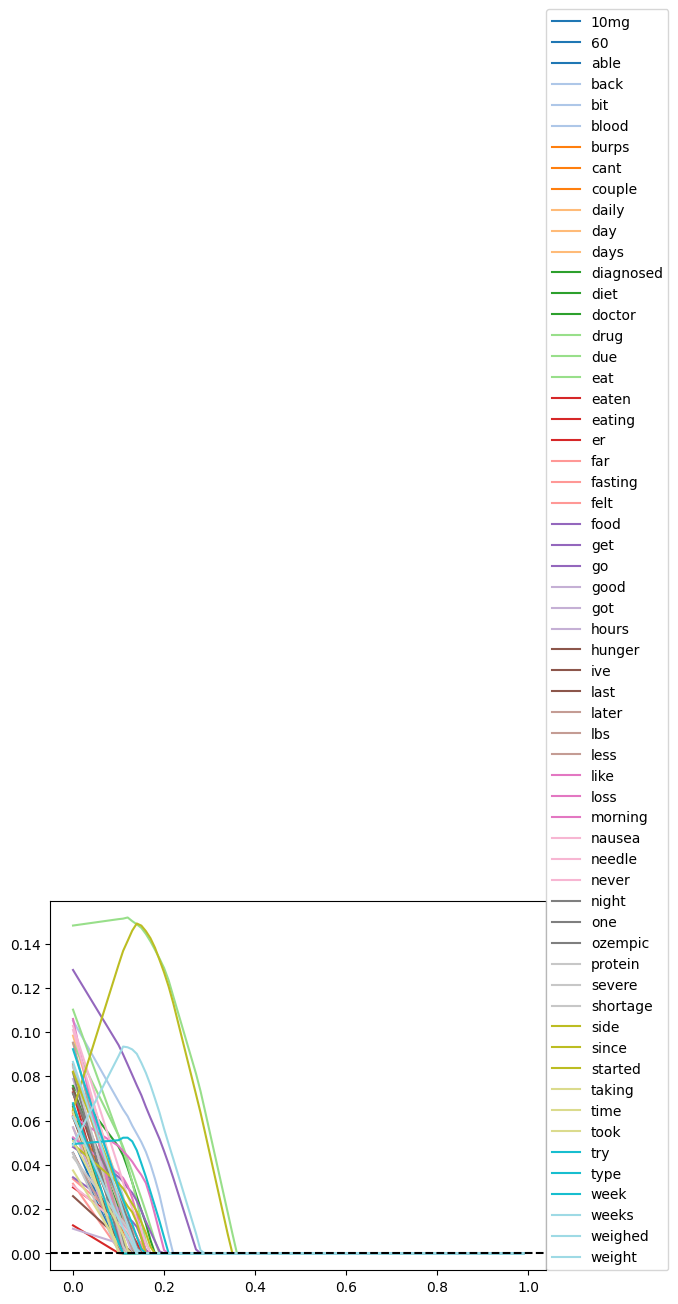

In [12]:

# Make a dataframe because its easier to plot
df_ = pd.DataFrame(out,columns=initial_words,index=Alpha)
                            #  word labels         alpha vals
# Plot it over alpha
df_.plot(cmap="tab20") # this colormap is easier to see
plt.axhline(0,color='black',ls="--") # origin line
plt.legend(loc=(1,0)) # get the legend out of the way

In [19]:
Alpha = np.arange(0,.03,.005)
# Fitting the LassoCV model with 10-fold cross validation
lasso_model = LassoCV(alphas=Alpha,cv=10)

# Fit the data
lasso_model = lasso_model.fit(X=X,y=y)


C:\Users\mqayum2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mqayum2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\mqayum2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and i

In [20]:
lasso_model.alpha_

0.005

In [21]:
final_words = list(data[words].loc[:,lasso_model.coef_!=0].columns)

Which were the most important?

Alot of them are very small, let's just look at ones that were more than .015 in either direction:

In [22]:
final_coefs = pd.DataFrame([words,lasso_model.coef_]).T

final_coefs = final_coefs.set_index(0)

final_coefs = final_coefs[final_coefs[1]!=0]

import numpy as np
final_coefs["abs_"] = np.abs(final_coefs[1])

In [23]:
final_coefs.sort_values(by='abs_', ascending=False)

,1,abs_
0,,
eat,0.117114,0.117114
weeks,0.111908,0.111908
severe,0.087067,0.087067
type,0.086743,0.086743
food,0.082857,0.082857
...,...,...
brands,-0.000012,0.000012
reaching,-0.000011,0.000011
episodes,0.000007,0.000007


In [25]:
meaningful_words = final_coefs[final_coefs['abs_']>.015].sort_values(by='abs_', ascending=False)

In [29]:
meaningful_words = meaningful_words.index

In [30]:
len(meaningful_words)

208